# Brute force random sample generation fixed applicability domain

### Original data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('glass.csv')
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Remove targets
df = df.drop(df.columns[[0,1,10]], axis=1)
print(df.shape)
df.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


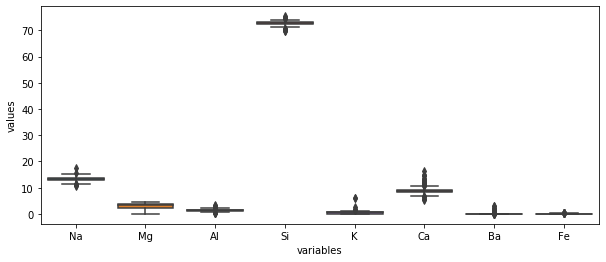

In [4]:
# See the distributions of variables

start = df.columns.get_loc('Na')          # column of 'cylinders'
end   = df.columns.get_loc('Fe') + 1     # column of 'acceleration'

fig = plt.figure(figsize=(10, 4))
sns.boxplot(data=df.iloc[:, start:end])
plt.xlabel('variables')
plt.ylabel('values')
plt.show()

In [5]:
# Remove outliers if necessary
df = df[df['K'] < 5.0]
df = df[df['Ca'] < 10.0]
print(df.shape)

(185, 8)


### Brute force

In [6]:
# Input the size of random variables
N = input('Input number of random variables for simulation : ')         # simulation sample size like 10000
N = int(N)

Input number of random variables for simulation : 1000


In [7]:
# Show original data range
df.describe().transpose()[['min', 'max']]

,min,max
Na,11.95,17.38
Mg,0.00,4.49
Al,0.29,3.50
Si,69.89,75.41
K,0.00,2.70
Ca,5.43,9.95
Ba,0.00,2.88
Fe,0.00,0.51


In [8]:
# Use fixed applicability domain to change the range
df = df[df.iloc[:, 0] >= 12.0]
df = df[df.iloc[:, 1] >= 1.0]
df = df[df.iloc[:, 2] >= 0.5]
df = df[df.iloc[:, 3] >= 65.0]
df = df[df.iloc[:, 4] >= 0.0]
df = df[df.iloc[:, 5] >= 5.0]
df = df[df.iloc[:, 6] >= 0.0]
df = df[df.iloc[:, 7] >= 0.0]

df = df[df.iloc[:, 0] <= 17.0]
df = df[df.iloc[:, 1] <= 4.0]
df = df[df.iloc[:, 2] <= 3.5]
df = df[df.iloc[:, 3] <= 75.0]
df = df[df.iloc[:, 4] <= 2.0]
df = df[df.iloc[:, 5] <= 8.0]
df = df[df.iloc[:, 6] <= 2.0]
df = df[df.iloc[:, 7] <= 0.0]

print('Changed domain')
df.describe().transpose()[['min', 'max']]

Changed domain


,min,max
Na,12.79,14.40
Mg,1.74,3.68
Al,1.36,2.22
Si,71.25,74.55
K,0.00,1.76
Ca,5.43,7.99
Ba,0.00,1.63
Fe,0.00,0.00


In [9]:
# Generate number N of random variables between min and max values in columns
list_columns = df.columns.values
print('id', 'element', 'min', 'max', sep = '\t')

random_var = np.zeros(N * len(list_columns[start:end])).reshape(N, len(list_columns[start:end]))

for i, name in enumerate(list_columns[start:end]) :
    min_column = min(df.iloc[:, start+i])
    max_column = max(df.iloc[:, start+i])
    column_rand = np.random.uniform(min_column, max_column, N)
    random_var[:, i] = column_rand
    print(i, name, min_column, max_column, sep = '\t')

df_comp_bf = pd.DataFrame(random_var)
df_comp_bf.columns = list_columns[start:end]

print('Shape of dataframe : ', df_comp_bf.shape)

id	element	min	max
0	Na	12.79	14.4
1	Mg	1.74	3.68
2	Al	1.36	2.22
3	Si	71.25	74.55
4	K	0.0	1.76
5	Ca	5.43	7.99
6	Ba	0.0	1.63
7	Fe	0.0	0.0
Shape of dataframe :  (1000, 8)


In [10]:
print(df_comp_bf.shape)
df_comp_bf.head()

(1000, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.857413,2.887605,1.800665,73.382214,0.895795,5.622467,0.729929,0.0
1,14.388532,3.332644,2.164194,73.805859,0.342983,7.473218,0.674961,0.0
2,14.008340,2.686673,1.400965,72.225382,0.913906,6.890050,1.036831,0.0
3,13.741442,3.523365,1.440238,73.024933,0.165313,6.955271,0.292904,0.0
4,13.044266,2.574029,1.978552,73.848463,0.404429,7.499824,0.684455,0.0


Samples generated for backward prediction


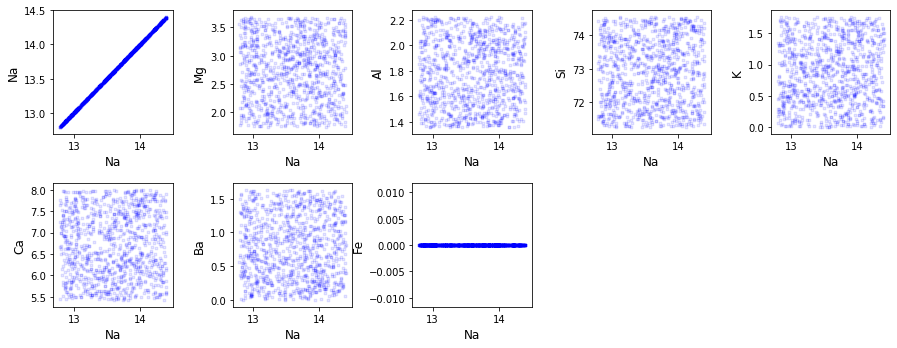

In [11]:
# Draw scatter plots of samples generated for reverse analysis
horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

print('Samples generated for backward prediction')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = df_comp_bf.iloc[:, start]
        y_sample = df_comp_bf.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='b', marker = '.', alpha = 0.01)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [12]:
# Adjust total amount say 100% if necessary
df_bf_adj = df_comp_bf.apply(lambda x: 100 * x/np.sum(x), axis=1)

print(df_bf_adj.shape)
df_bf_adj.head()

(1000, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.972535,2.911594,1.815624,73.991842,0.903237,5.669176,0.735992,0.0
1,14.081225,3.261466,2.117971,72.229528,0.335657,7.313607,0.660545,0.0
2,14.126701,2.709373,1.412803,72.835638,0.921628,6.948266,1.045591,0.0
3,13.860158,3.553805,1.452681,73.655820,0.166742,7.015360,0.295435,0.0
4,13.039830,2.573154,1.977879,73.823350,0.404292,7.497273,0.684223,0.0


Samples generated for reverse analysis


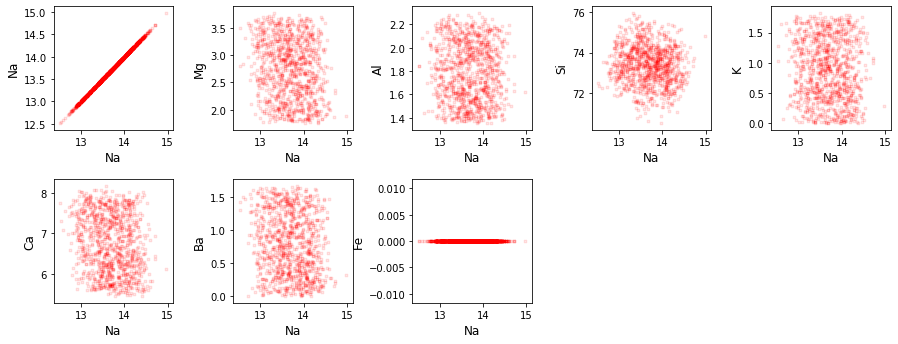

In [13]:
# draw scatter plots of samples generated for reverse analysis

horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

print('Samples generated for reverse analysis')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = df_bf_adj.iloc[:, start]
        y_sample = df_bf_adj.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='r', marker = '.', alpha = 0.01)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [14]:
# Sanity check adjustment result
test = np.sum(df_bf_adj, axis=1)
print(test[0:2])
print(test[998:1000])

0    100.0
1    100.0
dtype: float64
998    100.0
999    100.0
dtype: float64


In [15]:
# Save generated samples
df_comp_bf.to_csv('generated_samples_brute_force_AD.csv', index = None)